<center><img height="150" src="slogan.png" width="1000"></center>

<center><h1><u>Python Unit Summary Project</u></h1></center>

**Autor:** [Christian Araujo Yanez]  
**Fecha:** [29/11/2024]

## Introducción

Para este trabajo, se analizarán los datos del Titanic para verificar si hay una correlación entre las posibilidades de supervivencia y ciertas características de cada pasajero (género, clase de cabina, precio del boleto, etc.)

El ejercicio es calificado sobre **100 puntos**

## Instrucciones generales

 - Cada operación debe realizarse en una celda separada.
 - Puedes obtener ayuda en el material de la clase y buscar información en Internet.

## Parte 1 - Análisis de Datos Guiado

1. Importa las librerías necesarias al cuaderno. (Si más adelante necesitas usar librerías adicionales, regresa a esta celda, agrega las librerías aquí y ejecuta nuevamente la celda)

> Explicación: Por orden y organización, se recomienda que todas las librerías importadas al cuaderno estén al principio del mismo.

In [120]:
#Código
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. Importa el dataset `titanic.csv` en el cuaderno. Investiga la base de datos en internet y/o utiliza la información que se detalla a continuación para comprender las columnas: **(4 puntos)**

    - **PassengerId (Identificación del pasajero)**: Identificador único para cada pasajero.  
    - **Survived (Sobreviviente)**: Indica si el pasajero sobrevivió o no al naufragio. 1 = Sobrevivió, 0 = No sobrevivió.
    - **Pclass (Clase)**: Clase del pasajero en el barco. 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.
    - **Name (Nombre)**: Nombre del pasajero.
    - **Sex (Sexo)**: Género del pasajero.
    - **Age (Edad)**: Edad del pasajero en años.
    - **SibSp (Hermanos/Cónyuges a bordo)**: Número de hermanos o cónyuges que el pasajero tenía a bordo.
    - **Parch (Padres/Hijos a bordo)**: Número de padres o hijos que el pasajero tenía a bordo.
    - **Ticket (Boleto)**: Número del boleto del pasajero.
    - **Fare (Tarifa)**: Tarifa pagada por el pasajero.
    - **Cabin (Cabina)**: Número de la cabina del pasajero.
    - **Embarked (Puerto de embarque)**: Puerto donde el pasajero embarcó. C = Cherbourg, Q = Queenstown, S = Southampton.

In [ ]:
#Código
df = pd.read_csv('titanic.csv')

3. Usando los métodos que hemos aprendido, inspecciona el dataframe y realiza lo siguiente: **(7 puntos)**

    - Revisa los valores nulos en las columnas
    - En el caso que haya valores nulos:        
        - ¿Tiene sentido que esas columnas tengan valores nulos? 
        - ¿Cuántos valores nulos existen? 
        - ¿Los valores nulos afectarán el análisis?

In [55]:
#Código y explicación

#Para revisar los nulos, usamos la función info que indica cuantos de los registros no son nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
'''
al revisar el resultado de info, vemos que en la columna non-null count, las columnas age, cabin y embarked tienen valores menores a 891 (total de filas) 
lo que nos indica que en esas columnas existen valores nulos

para el caso de la columna age tiene 177 filas con nulos (891-177), estos datos si afectan al análisis 
para el caso de la columna cabin tiene 697 filas con nulos (891-204), po
para el caso de la columna embarked tiene 2 filas con nulos (891-899), no afecta mucho porque no tiene muchos null y puede ser actualizado por registros similares    
'''

'\nal revisar el resultado de info, vemos que en la columna non-null count, las columnas age, cabin y embarked tienen valores menores a 891 (total de filas) \nlo que nos indica que en esas columnas existen valores nulos\n\npara el caso de la columna age tiene 177 filas con nulos (891-177), estos datos si afectan al análisis \npara el caso de la columna cabin tiene 697 filas con nulos (891-204), po\npara el caso de la columna embarked tiene 2 filas con nulos (891-899), no afecta mucho porque no tiene muchos null y puede ser actualizado por registros similares    \n'

4. Eliminar la columna `Cabin` del df **(4 punto)**

In [ ]:
# Código
'''
para borrar una columna usamos la funcion drop sobre el dataframe, en drop pasamos los siguientes parametros:
1. nombre de la columna a borrar
2. axis=1 porque vamos a borrar una columna
3. inplace=true para guardar los cambios en el dataframe
'''

df.drop('Cabin',axis=1,inplace=True)

In [57]:
# ahora validamos con que columnas queda el dataframe usando en este caso la función info de nuevo. Hay otras funciones que igual nos pueden mostrar las columnas del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


5. Actualiza los valores nulos de la columna `Age` para las mujeres, usando el valor de la mediana de edad de todas las pasajeras mujeres **(7 puntos)**

In [69]:
# Código
# creamos una máscara para extrar la data solo de mujeres
mask_women=df['Sex']=="female"

# aplicamos la máscara y extramemos la media (redondeada porque la edad ser un entero) de la edad, en este caso de todas las mujeres
mean_women_age = round (df['Age'][mask_women].mean(),0)

# actualizamos los datos nulos con la mediana de la edad 
df.loc[mask_women,'Age']=df.loc[mask_women,'Age'].fillna(mean_women_age)

#revisamos la actualización en una de las filas que tiene null en Age y es female
df[df['PassengerId']==20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.225,C


6. Actualiza los valores nulos de la columna `Age` para los hombres, usando el valor de la mediana de edad de todos los pasajeros hombres **(7 puntos)**

In [71]:
# Código
# creamos una máscara para extrar la data solo de mujeres
mask_men=df['Sex']=="male"

# aplicamos la máscara y extramemos la media (redondeada porque la edad ser un entero) de la edad, en este caso de todas los hombres
mean_men_age = round (df['Age'][mask_men].mean())

# actualizamos los datos nulos con la mediana de la edad 
df.loc[mask_men,'Age']=df.loc[mask_men,'Age'].fillna(mean_men_age)

#revisamos la actualización en una de las filas que tiene null en Age y es male
df[df['PassengerId']==18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.0,0,0,244373,13.0,S


7. Rellena el valor faltante en la columna de `Embarked` con el valor más común (el valor que más se repite en esta columna) **(7 puntos)**

In [76]:
#Código
#tomando en consideración que el valor que más se repite es el concepto de moda usaremos este método para obtener el valor a actualizar
most_used_value = df['Embarked'].mode()[0]  # .mode() devuelve una serie, por eso tomamos el primer valor con [0]

#actualizamos el valor en las filas que tienen null en la columna Embarked
df['Embarked'].fillna(most_used_value, inplace=True)

#validamos que se haya actualizado el valor de una fila que tiene Embarked en null
df[df['PassengerId']==62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S


8. Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) en porcentaje. Escoge un gráfico claro y presentable. **(7 puntos)**

<Axes: title={'center': 'Passenger distribution by gender'}>

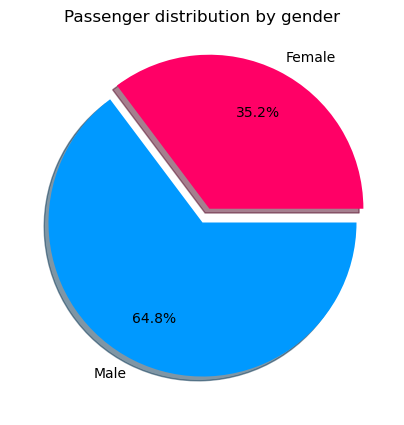

In [85]:
# Código

#usaremos un gráfico de pastel para visualizar la proporción de pasajeros por género
#rosado -> FF0066
#azul -> 0099FF
df.groupby('Sex')['Sex'].count().plot.pie(
            colors=('#FF0066','#0099FF'),
            labels=('Female', 'Male'),
            autopct='%1.1f%%',
            pctdistance=0.7,
            shadow=True, 
            explode=(0.1, 0),                                         
            figsize=(5,5),
            title='Passenger distribution by gender',
            ylabel=''
)


9. Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) y si sobrevivieron (`Survived`). Escoge un gráfico claro y presentable. **(7 puntos)**

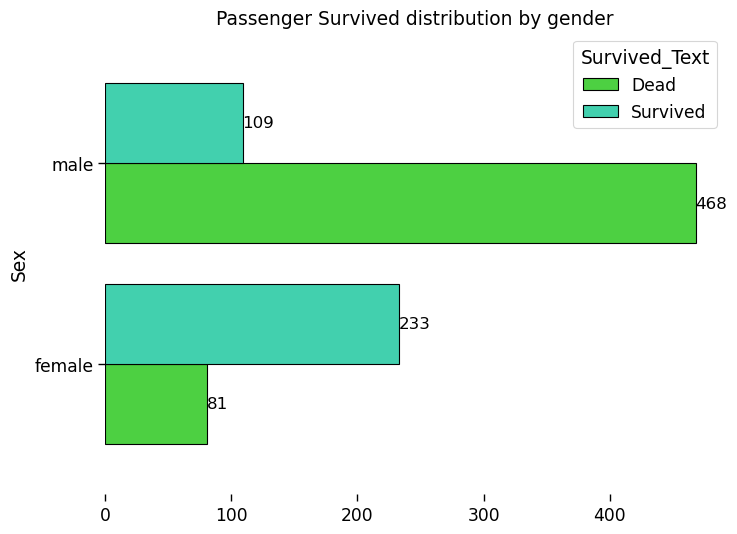

In [225]:
# Código

def SurvivedName (state):
    if state==0:
        return 'Dead'
    else:
        return 'Survived'

#creamos una nueva columna que tiene el estado de superviviencia en texto
df['Survived_Text']=df['Survived'].apply(SurvivedName)

#creamos una tabla pivot para generar los datos para el gráfico
pt1 = df.pivot_table(
    index='Sex'
    , columns='Survived_Text'
    , values='PassengerId'
    , aggfunc='count')

#graficamos los datos 
graph=pt1.plot.barh(width=0.8,
              color=('#4dd042','#42d0ae'), 
              edgecolor='black', 
              figsize=(8,6),
              title='Passenger Survived distribution by gender',
              stacked=False
             )

#añadimos las etiquetas de cada columna por separado
graph.bar_label(graph.containers[0],size=12)
graph.bar_label(graph.containers[1],size=12)

#quitamos los bordes (los 4 latos) del gráfico para que no se vea estrecho
graph.spines['top'].set_visible(False)
graph.spines['right'].set_visible(False)
graph.spines['bottom'].set_visible(False)
graph.spines['left'].set_visible(False)

              

10. Usa un gráfico displot para mostrar la distribución de los pasajeros por edades. Sigue las siguientes instrucciones: **(10 puntos)**

    - Separa en dos gráficos según los valores en la columna de género (`Sex`).
    - Dentro de cada gráfico, divide los datos en series según los datos en la columna `Survived`.
    - Configura la visualización para que los datos estén apilados.
    
Vista previa:   


<img height="500" src="preview.png" width="800">

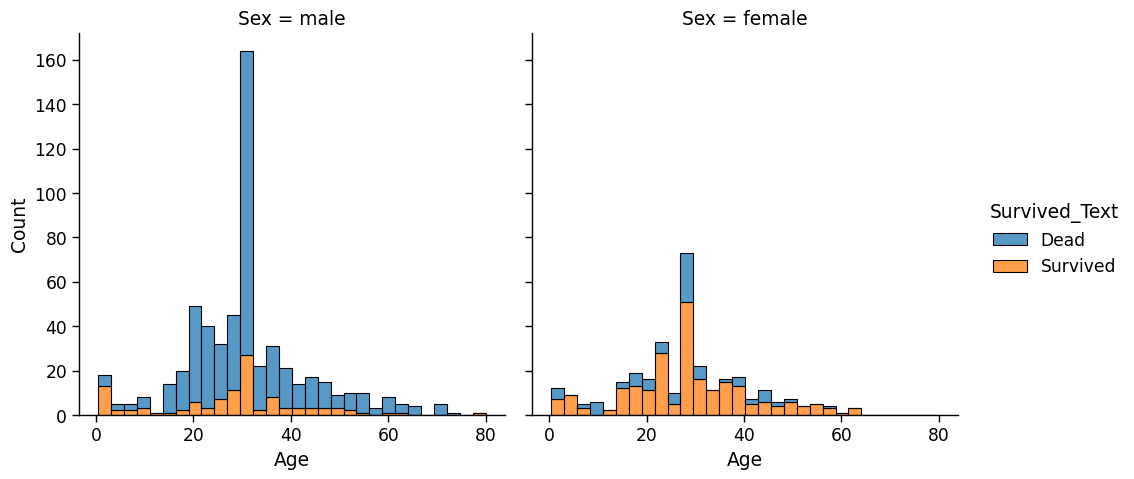

In [208]:
# Código
# usamos la funcion de seaborn para crear un displot, enviamos los parámetros de la siguiente manera
'''
1. El dataframe con los datos
2. Los datos para el eje x debe ser la columna Age
3. Los datos para hue es para apilan en cada gráfico
4. La variale col indica en base a que se separan los datos
5. El parámetro Multiple indica como se apilan los datos
'''
sns.displot(df
            ,x='Age'
            ,hue='Survived_Text'
            ,col='Sex'
            ,multiple='stack'
            )


11. Ahora, examina si existe una correlación entre las diferentes columnas. Para ello, selecciona solo las columnas que tengan significado (por ejemplo, el número de pasajeros puede variar, pero esta cifra no afecta a los resultados del análisis). **(10 puntos)**

    - Crea una tabla de correlación aplicando el método `corr()` a los datos. Guarda el resultado en una variable llamada `corr_mtx`.
    - Crea un gráfico de mapa de calor que se ejecutará en los datos de la tabla de correlación y diséñalo como desees.
    - ¿Existe una correlación positiva fuerte (valores cercanos a 1) o una correlación negativa (valores cercanos a -1) entre alguna de las columnas?

<Axes: >

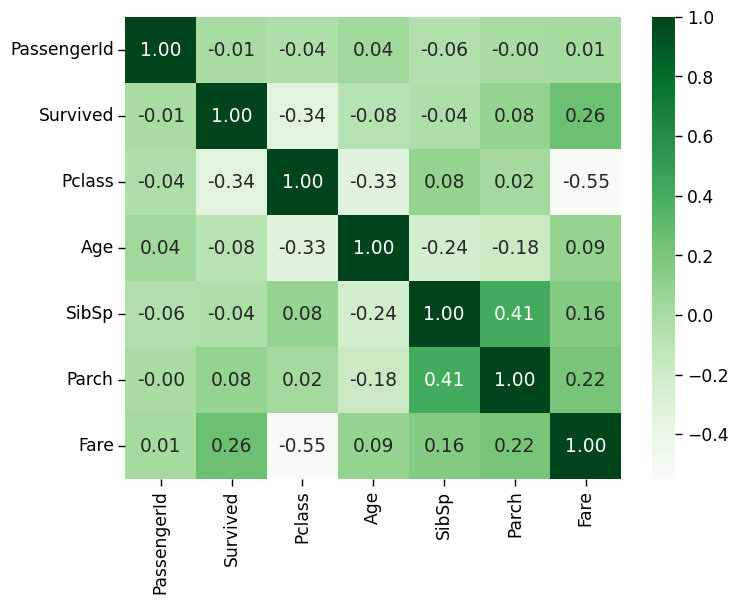

In [144]:
# Código y explicación
crash_mtx = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(crash_mtx, annot=True, cmap='Greens', fmt='.2f')

In [ ]:
'''
1. (-0,33) Existe relación indirecta es respecto a las columnas de edad y la clase a la que pertenecen en el barco. Es decir que a mayor 
edad más baja la clase a la que pertenece, o viceversa que a menor edad mayor es la clase a la que pertenece.

2. (-0,34) Existe una relación indirecta entre la clase de los pasajeros y si estos sobrevivieron o no al accidente, mientras mas alta la clase, 
menor es la probabilidad de que haya sobrevivido. 

3. (-0,55) Existe una relación indirecta entre la clase a la que pertenece el pasajero y el valor de la tarifa por el viaje, es decir que a 
mayor clase (menor valor de clase) mayor es el valor de la tarifa.

4. (0,41) Existe una fuerte correlacion positiva entre SibSp y Parch que permite inferir que la información entre padres o hijos 
y hermanos o cónyuges a bordo del barco estan directamente
relacionados.

'''

## Parte 2 - Análisis continuo

12. Define 3 preguntas de investigación para analizar quién tiene una alta probabilidad de sobrevivir, y luego responde a las preguntas que has definido. **(30 puntos)**

In [ ]:
#Funciones para mejorar la legibilidad de los gráficos

#Función para transformar la ciudad de embarque a un texto más completo en lugar de solo la inicial
def EmbarkedName (Embarked):
    if Embarked=='C':
        return "Cherbourg"
    elif Embarked=='Q':
        return "Queenstown"
    elif Embarked=='S':
        return "Southampton"
    else:
        return "No Defined"

#usamos la función para crear una columna nueva en la que se use la función para comparar el valor de la columna Embarked 
df["Embarked_Name"]=df['Embarked'].apply(EmbarkedName)

#Función para transformar la clase del pasajero a un texto más completo en lugar de solo la inicial
def PClassName (Class):
    if Class==1:
        return "First Class"
    elif Class==2:
        return "Second Class"
    elif Class==3:
        return "Third Class"
    else: "Other Class"

#usamos la función para crear una columna nueva en la que se use la función para comparar el valor de la columna Pclass 
df["PClass_Name"]=df['Pclass'].apply(PClassName)


<Axes: xlabel='Sex', ylabel='Age'>

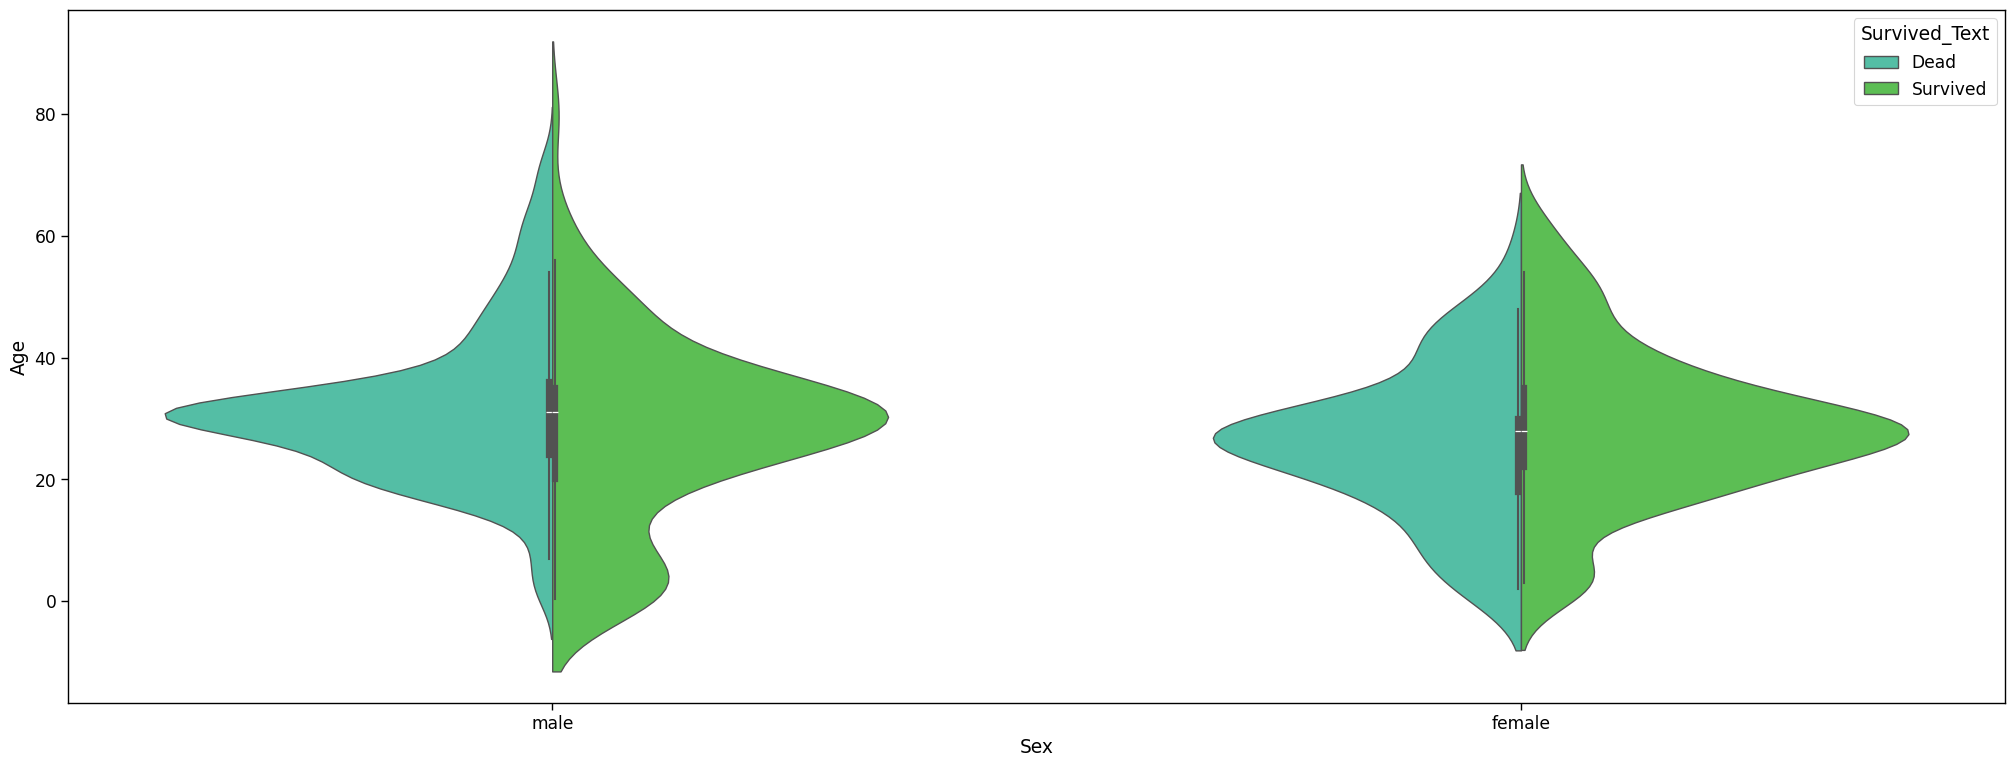

In [ ]:
# Código y explicación
# Hipothesis 1, la edad y genero del pasajero define su probabilidad de sobrevivir?

#creamos in diagrama con los datos del dataframe 
fig = plt.figure(figsize=(25, 9))
sns.violinplot( 
                data=df
                , x='Sex'
                , y='Age'
                , hue='Survived_Text'
                , split=True
                , palette={'Survived': "#4dd042", 'Dead': "#42d0ae"}
              )


In [ ]:
'''
Resultado de análisis de hipótesis 1
Como vemos en el gráfico anterior, la probabilidad de sobrevivir se relaciona en ser una mujer ya que en el gráfico anterior tenemos un pico verder 
más amplio para las mujeres que para los hombres. Además podemos ver que la edad en el caso de los hombres si incide en que sobrevivan pero no es 
una condición que afecte a la mortalidad de las mujeres, es decir que  se puede validar el viejo refrán que dice: MUERES Y NIÑOS PRIMERO , en caso 
de accidentes.
'''

'\nComo vemos en el gráfico anterior, la probabilidad de sobrevivir se relaciona en ser una mujer ya que en el gráfico anterior tenemos un pico amplio \npara las mujeres que para los hombres. Además podemos ver que la edad en el caso de los hombres si incide en que sobrevivan pero no es una condición\nque afecte a la mortalidad de las mujeres, es decir que  se puede validar el viejo refrán que dice: MUERES Y NIÑOS PRIMERO , en caso de accidentes\n'

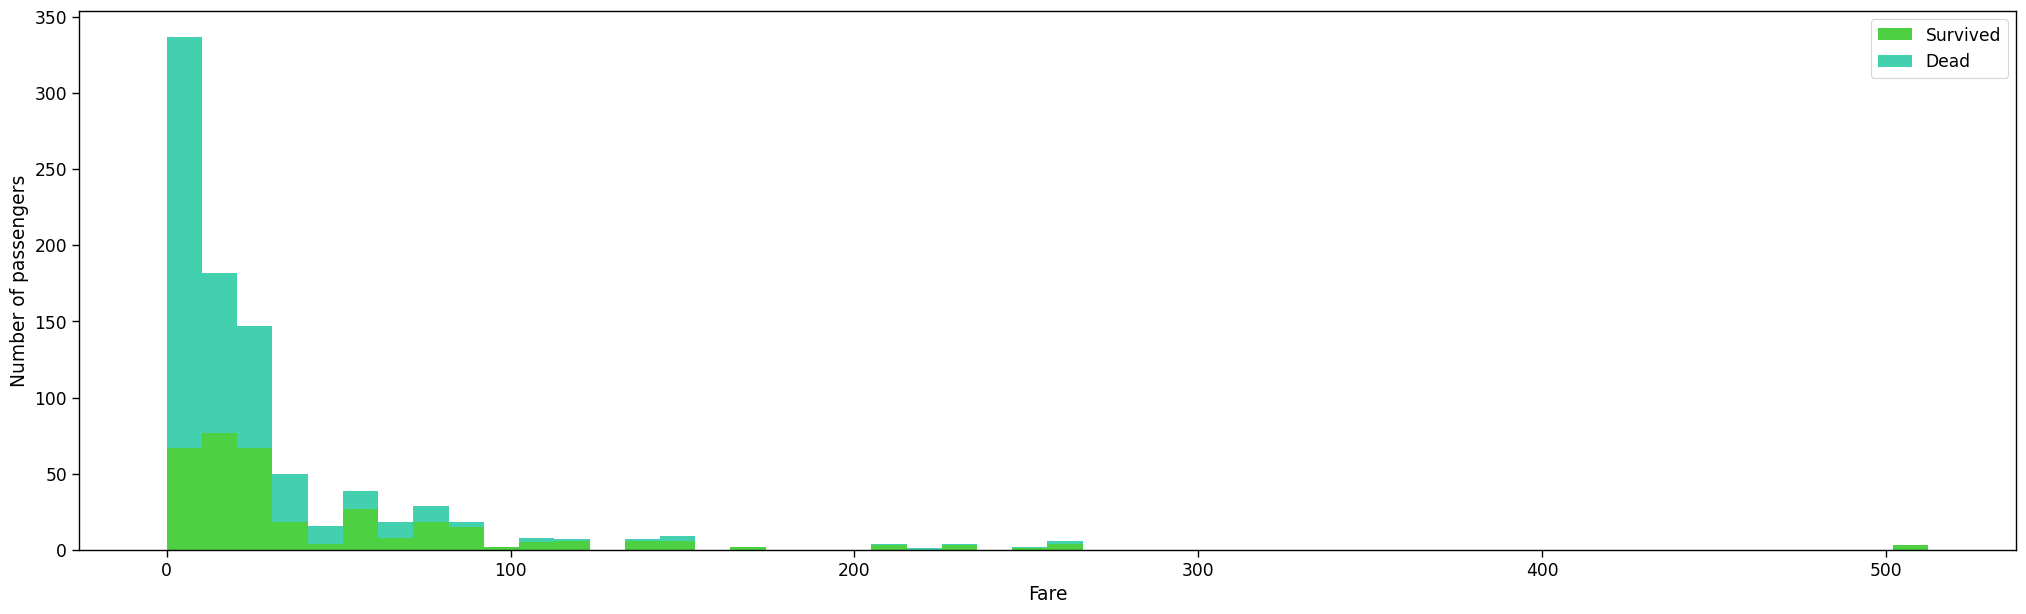

In [ ]:
#Hipothesis 2 Definir si el valor de la tarifa se relaciona con la supervivencia de un pasajero

#creamos in diagrama con los datos del dataframe 
figure = plt.figure(figsize=(25, 7))
plt.hist(
        [df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']] 
        , stacked=True
        , color = ['#4dd042','#42d0ae']
        , bins = 50
        , label = ['Survived','Dead']
        )
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

In [ ]:
'''
Resultado de análisis de hipótesis 2
En el gráfico anterior evidenciamos que mientras menor es el valor de la tarifa del viaje, mayor es la probabilidad de haber muerto; es decir que
las personas con una posición económica alta tiene mayor probabilidad de ser rescatado o puesto a salvo 
'''

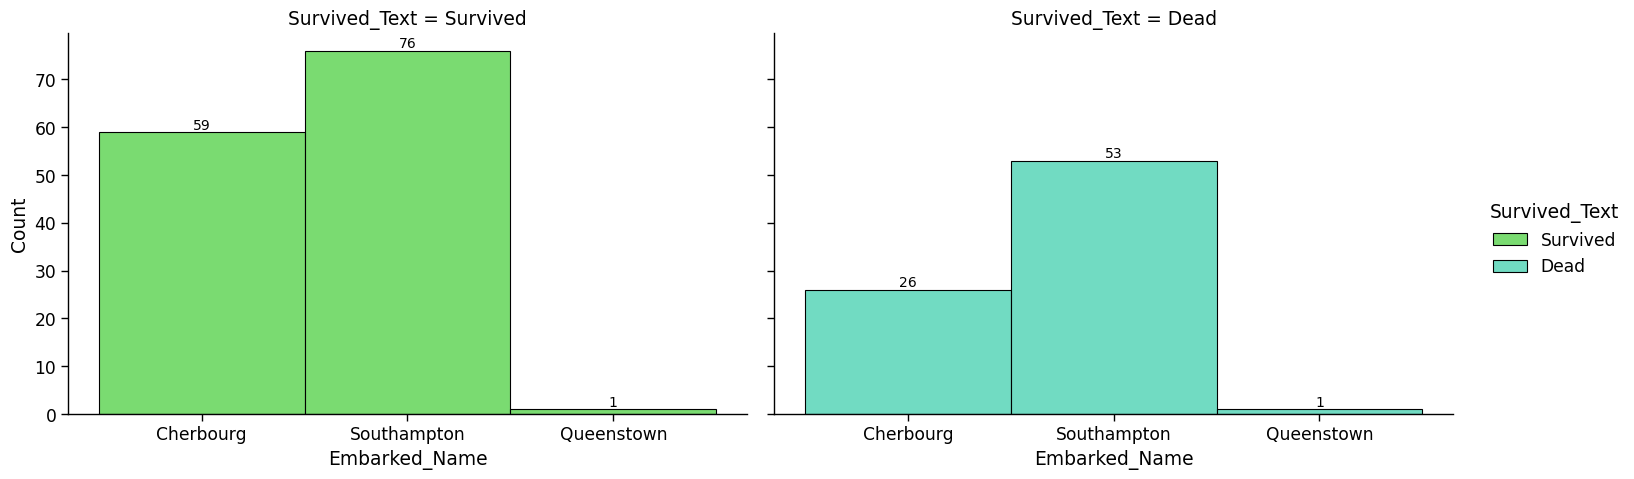

In [ ]:
#Hipothesis 3 En vista de la marcada relación entre la clase a la que pertenece el pasajero y la posibilidad de salvarse son directamente proporcionales
#entonces podriamos identicad la ubicación desde la cual se embararon la mayor cantidad de la clase alta.

#primero filtramos el dataframe para trabajar solo con la información de los pasajeros de primera clase
filtered_data = df[df["PClass_Name"] == "First Class"]

#creamos un displot con la información filtrada
g=sns.displot(filtered_data
            ,x='Embarked_Name'
            ,hue='Survived_Text'
            ,col='Survived_Text'
            ,multiple='stack'
            ,palette=['#4dd042','#42d0ae']
)

#añadimos etiquetas sobre las barras
for ax in g.axes.flat:  #recorremos todos los ejes del gráfico
    for patch in ax.patches:  #recorremos cada barra del histograma
        #obtenemos coordenadas y valor de altura
        x = patch.get_x() + patch.get_width() / 2  # Centro de la barra
        y = patch.get_height()  # Altura de la barra
        if y > 0:  # Solo etiquetar si la altura es mayor a 0
            ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

In [ ]:
'''
Resultado de análisis de hipótesis 3
En el gráfico anterior identificamos que la ciudad desde la cual partieron mas pasajeros es Southampton que tiene un total de 76 pasajeros que sobrevivieron 
del total de 129, es decir más del 50% de los pasajeros de esa ciudad de embarque  y que pertenecen a la primera clase sobrevivieron.
'''